In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm      
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [3]:
dataset = pd.read_excel("crp.xlsx", sheet_name="Sheet1")

In [4]:
dataset

,Year,City,Population (in Lakhs) (2011)+,Murder,Kidnapping,Crime against women,Crime against children,Crime Committed by Juveniles,Crime against Senior Citizen,Crime against SC,Crime against ST,Economic Offences,Cyber Crimes
0,2014,Ahmedabad,63.5,82,367,1371,437,215,68,66,6,399,32
1,2015,Ahmedabad,63.5,94,332,1067,609,157,17,60,9,378,28
2,2016,Ahmedabad,63.5,103,376,1126,481,258,362,96,10,479,77
3,2017,Ahmedabad,63.5,90,263,1405,600,405,534,119,6,608,112
4,2018,Ahmedabad,63.5,98,277,1416,733,352,733,145,9,842,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2017,Surat,45.8,89,332,559,526,436,131,32,10,719,105
148,2018,Surat,45.8,108,373,712,1075,409,161,29,13,829,155
149,2019,Surat,45.8,97,358,1015,770,516,232,34,19,804,228
150,2020,Surat,45.8,116,163,633,419,298,69,20,12,401,204


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         152 non-null    int64  
 4   Kidnapping                     152 non-null    int64  
 5   Crime against women            152 non-null    int64  
 6   Crime against children         152 non-null    int64  
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   152 non-null    int64  
 9   Crime against SC               152 non-null    int64  
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              152 non-null    int64  
 12  Cyber Crimes                   152 non-null    int

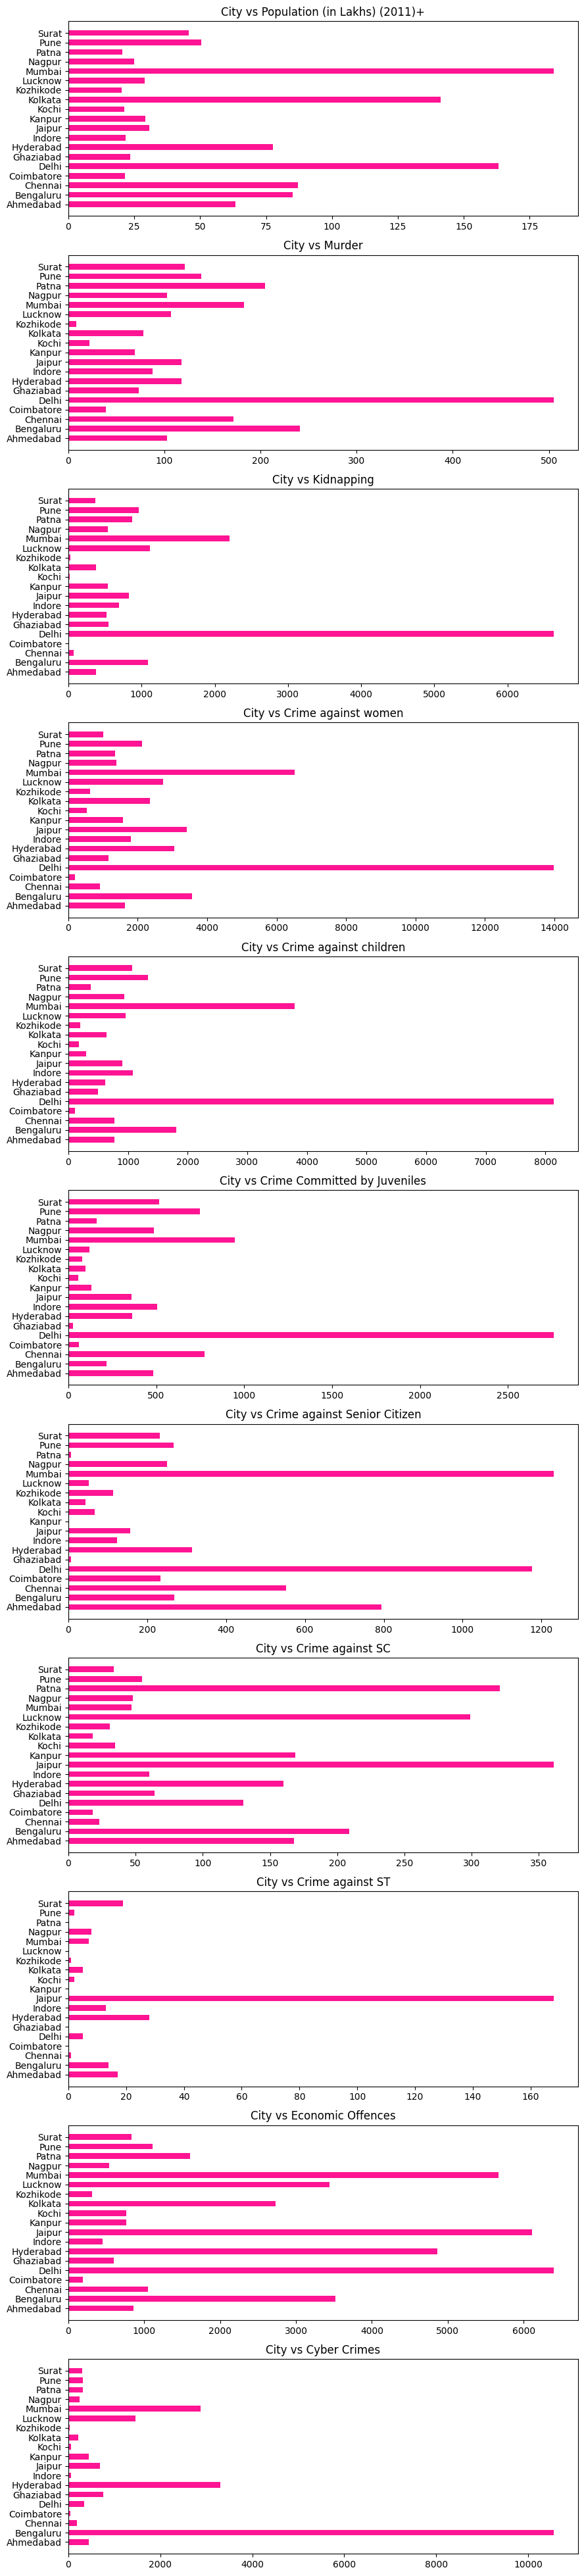

In [7]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))

for i in range(0, 11):
    ax[i].barh(dataset['City'], dataset[dataset.columns[i+2]], 0.6, color='deeppink')
    ax[i].set_title('City vs ' + dataset.columns[i+2])
plt.show()

In [8]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = dataset[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]
    
    new_df = pd.concat([new_df, temp])

C:\Users\91830\AppData\Local\Temp\ipykernel_3816\2150212361.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp])


In [9]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes
148,2018,Surat,45.8,155,Cyber Crimes
149,2019,Surat,45.8,228,Cyber Crimes
150,2020,Surat,45.8,204,Cyber Crimes


In [10]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']

In [11]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type,Crime Rate
0,2014,Ahmedabad,63.5,82,Murder,1.291339
1,2015,Ahmedabad,63.5,94,Murder,1.480315
2,2016,Ahmedabad,63.5,103,Murder,1.622047
3,2017,Ahmedabad,63.5,90,Murder,1.417323
4,2018,Ahmedabad,63.5,98,Murder,1.543307
...,...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes,2.292576
148,2018,Surat,45.8,155,Cyber Crimes,3.384279
149,2019,Surat,45.8,228,Cyber Crimes,4.978166
150,2020,Surat,45.8,204,Cyber Crimes,4.454148


In [12]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [13]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
147,2017,Surat,45.8,Cyber Crimes,2.292576
148,2018,Surat,45.8,Cyber Crimes,3.384279
149,2019,Surat,45.8,Cyber Crimes,4.978166
150,2020,Surat,45.8,Cyber Crimes,4.454148


In [14]:
new_df.to_excel("new_dataset.xlsx", index=False, sheet_name ='Sheet1')

In [15]:
new_dataset = pd.read_excel("new_dataset.xlsx", sheet_name="Sheet1")
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
1515,2017,Surat,45.8,Cyber Crimes,2.292576
1516,2018,Surat,45.8,Cyber Crimes,3.384279
1517,2019,Surat,45.8,Cyber Crimes,4.978166
1518,2020,Surat,45.8,Cyber Crimes,4.454148


In [16]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.5+ KB


In [17]:
new_dataset.describe()

,Year,Population (in Lakhs) (2011)+,Crime Rate
count,1520.000000,1520.000000,1520.000000
mean,2017.500000,60.015789,11.581238
std,2.292042,50.006465,19.529756
min,2014.000000,20.300000,0.000000
25%,2015.750000,21.700000,0.943396
50%,2017.500000,30.700000,4.065514
75%,2019.250000,85.000000,14.486662
max,2021.000000,184.100000,198.925081


In [18]:
le = LabelEncoder()

In [19]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [20]:
file = open('City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [21]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [22]:
# Saving the mapping file for further use
file = open('Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [23]:
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,0,63.5,9,1.291339
1,2015,0,63.5,9,1.480315
2,2016,0,63.5,9,1.622047
3,2017,0,63.5,9,1.417323
4,2018,0,63.5,9,1.543307
...,...,...,...,...,...
1515,2017,18,45.8,6,2.292576
1516,2018,18,45.8,6,3.384279
1517,2019,18,45.8,6,4.978166
1518,2020,18,45.8,6,4.454148


In [24]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2014. ,    0. ,   63.5,    9. ],
       [2015. ,    0. ,   63.5,    9. ],
       [2016. ,    0. ,   63.5,    9. ],
       ...,
       [2019. ,   18. ,   45.8,    6. ],
       [2020. ,   18. ,   45.8,    6. ],
       [2021. ,   18. ,   45.8,    6. ]])

In [25]:
y = new_dataset['Crime Rate'].values
y

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [27]:
x_train

array([[2.018e+03, 8.000e+00, 3.070e+01, 1.000e+00],
       [2.015e+03, 1.200e+01, 2.030e+01, 3.000e+00],
       [2.014e+03, 5.000e+00, 2.360e+01, 6.000e+00],
       ...,
       [2.015e+03, 1.200e+01, 2.030e+01, 7.000e+00],
       [2.019e+03, 1.300e+01, 2.900e+01, 9.000e+00],
       [2.014e+03, 1.700e+01, 5.050e+01, 6.000e+00]])

In [28]:
y_train

array([ 5.86319218,  0.98522167,  2.58474576, ..., 12.95566502,
        2.5862069 ,  2.77227723])

In [29]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.320485537023602
Mean Squared Error: 371.7907414958839
R2 score: -0.17886853639175593


In [31]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6.846579820991532
Mean Squared Error: 150.44504177108698
R2 score: 0.5229711060407313


In [33]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.8885944658696903
Mean Squared Error: 34.87383261544959
R2 score: 0.8894225718253899


In [35]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.487973049950136
Mean Squared Error: 21.362971441526998
R2 score: 0.9322626088672231


In [37]:
import pickle

In [38]:
#saving the model as .pkl file
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [39]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.9322626088672231


In [40]:
import joblib # Assuming model4 is your trained model 
joblib_filename = "model.joblib" 
with open(joblib_filename,'wb') as file:
    joblib.dump(model4, joblib_filename)